## What Is Statistical Learning?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model # regressor

### Advertising Data

In [6]:
# get Advertising data
Advertising = pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/Advertising.csv", index_col=0)

In [7]:
Advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Figure 2.1

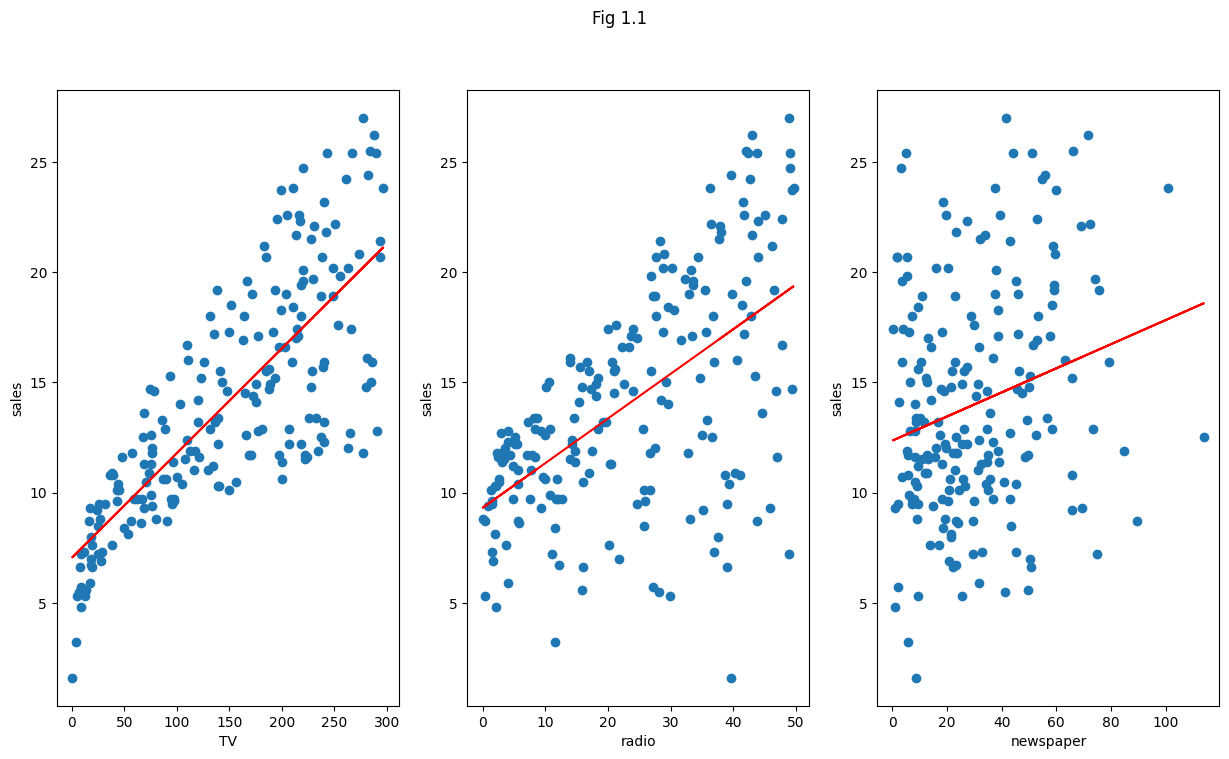

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(15, 8))
fig.suptitle('Fig 2.1')
# plot 1
# Fit with lm
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['TV']], Advertising.loc[:,'sales']) 
ax1.scatter(y = 'sales', x = 'TV', data = Advertising)
ax1.plot(Advertising.loc[:,['TV']], regressor.predict(Advertising.loc[:,['TV']]), '-r')
ax1.set_ylabel("sales"); ax1.set_xlabel("TV")
# plot 2
# Fit with lm
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['radio']], Advertising.loc[:,'sales']) 
ax2.scatter(y = 'sales', x = 'radio', data = Advertising)
ax2.plot(Advertising.loc[:,['radio']], regressor.predict(Advertising.loc[:,['radio']]), '-r')
ax2.set_ylabel("sales"); ax2.set_xlabel("radio")
# plot 3
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['newspaper']], Advertising.loc[:,'sales']) 
ax3.scatter(y = 'sales', x = 'newspaper', data = Advertising)
ax3.plot(Advertising.loc[:,['newspaper']], regressor.predict(Advertising.loc[:,['newspaper']]), '-r')
ax3.set_ylabel("sales"); ax3.set_xlabel("newspaper");

### Income Dataset

In [12]:
# get Income data
Income1 = pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/Income1.csv", index_col=0)

In [13]:
Income1.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


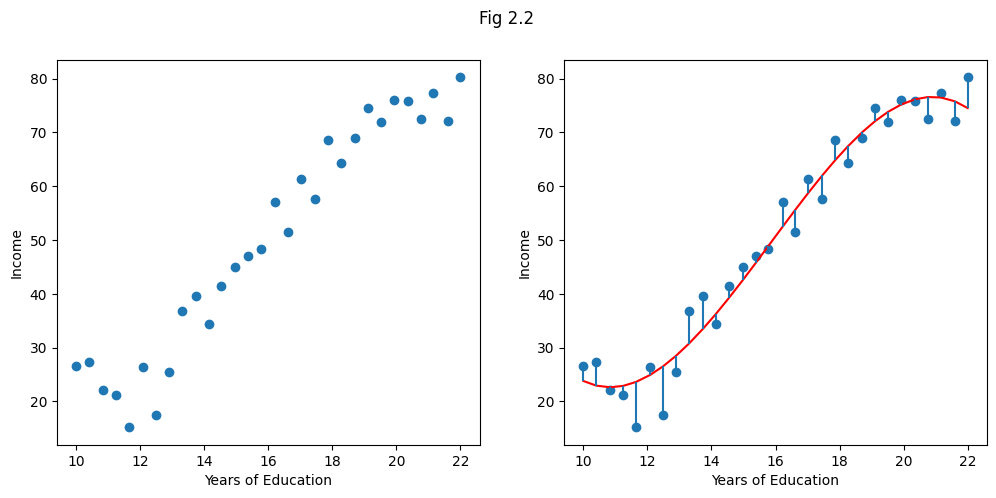

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(12, 5))
fig.suptitle('Fig 2.2')
# plot 1
ax1.scatter(y = 'Income', x = 'Education', data = Income1)
ax1.set_ylabel("Income"); ax1.set_xlabel("Years of Education")
# plot 2
income_education_model = numpy.poly1d(numpy.polyfit(Income1.Education, Income1.Income, 3))
ax2.scatter(Income1.Education, Income1.Income)
ax2.plot(Income1.Education, income_education_model(Income1.Education), '-r')
ax2.vlines(Income1.Education, income_education_model(Income1.Education), Income1.Income) # just wanted to plot those error lines
ax2.set_ylabel("Income"); ax2.set_xlabel("Years of Education");

### Income 2 Data

In [62]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# get Income data
Income2 = pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/Income2.csv", index_col=0)

In [64]:
Income2.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


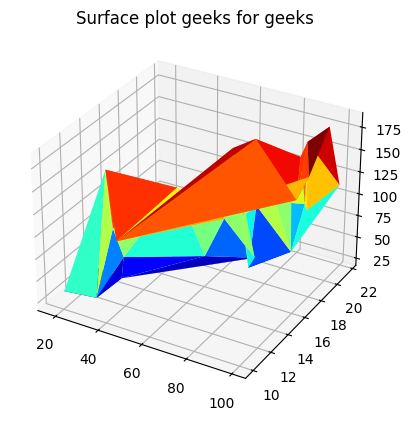

In [103]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# syntax for plotting
ax.plot_trisurf(
    Income2.Income, Income2.Education, Income2.Seniority, cmap=cm.jet, linewidth=0.2
)
ax.set_title('Surface plot geeks for geeks')
plt.show();

### Stock Market Data

In [7]:
# get wages data
Smarket = pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/Smarket.csv")

In [8]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


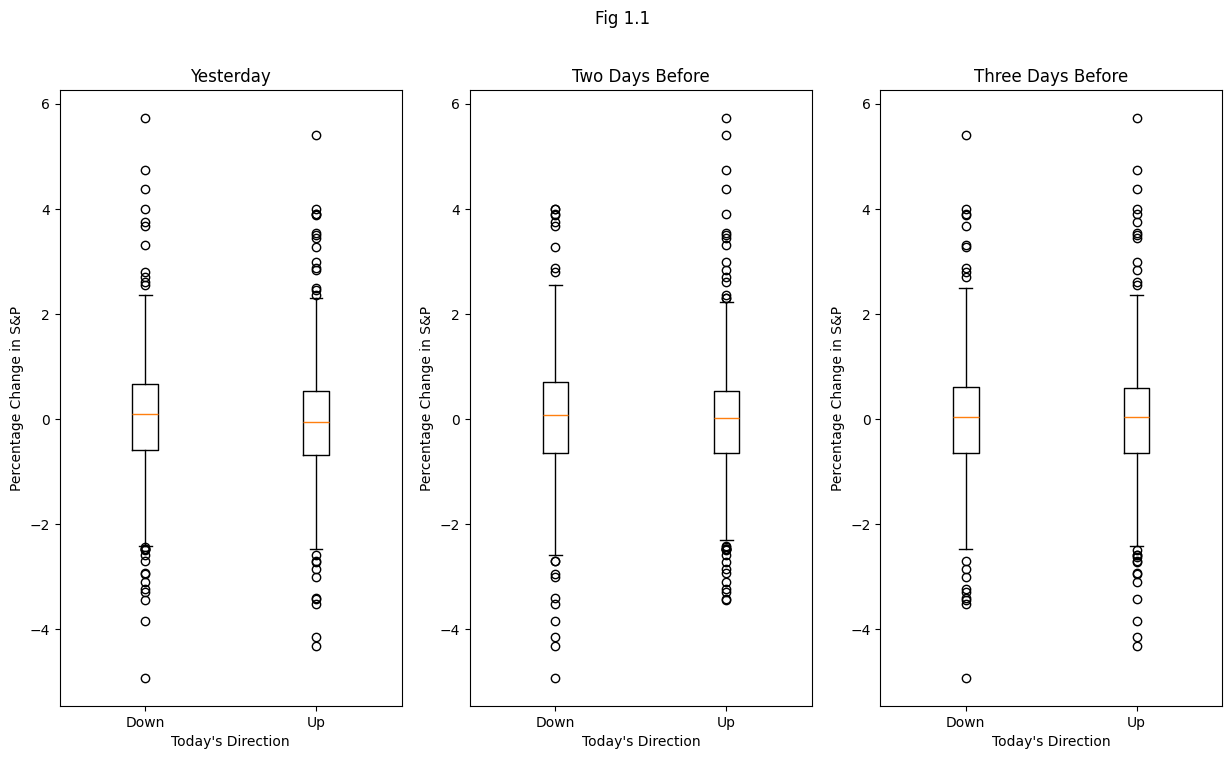

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(15, 8))
fig.suptitle('Fig 1.1')
# plot 1
grouped = Smarket.groupby('Direction')['Lag1']
ax1.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax1.set_ylabel("Percentage Change in S&P"); ax1.set_xlabel("Today's Direction");
ax1.set_title("Yesterday")
# plot 2
grouped = Smarket.groupby('Direction')['Lag2']
ax2.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax2.set_title("Two Days Before")
ax2.set_ylabel("Percentage Change in S&P"); ax2.set_xlabel("Today's Direction");
# plot 3
grouped = Smarket.groupby('Direction')['Lag3']
ax3.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax3.set_title("Three Days Before")
ax3.set_ylabel("Percentage Change in S&P"); ax3.set_xlabel("Today's Direction");

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

In [11]:
# train and test data
train_data = Smarket[Smarket['Year'] < 2005]
test_data = Smarket[Smarket['Year']>= 2005]
#
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_data.iloc[:,0:8], train_data.loc[:,'Direction']);

In [12]:
pred_data_test = pd.DataFrame(
    clf.predict_proba(test_data.iloc[:,0:8])
)
pred_data_test.columns = ["DOWN", "UP"]

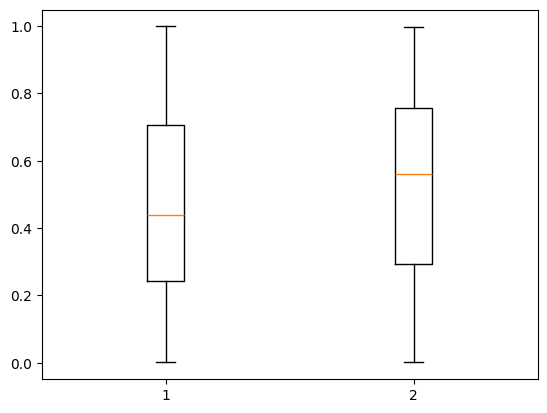

In [13]:
plt.boxplot(
    pred_data_test
);

### Gene Expression Data

In [14]:
# get wages data
# pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/")